In [17]:
import os
import tensorflow as tf
os.environ["SM_FRAMEWORK"] = "tf.keras"
import segmentation_models as sm
import numpy as np
import scipy.io as sio
import cv2

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
BACKBONE = "efficientnetb2"

In [10]:
model = sm.Unet(BACKBONE, encoder_weights='imagenet')

In [11]:
model.load_weights("../downloads/UNet/efficientnetb2/output/newNetwork.h5")

In [12]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, None, None, 3 128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, None, None, 3 0           stem_bn[0][0]                    
____________________________________________________________________________________________

In [18]:
import matplotlib.pyplot as plt

In [47]:
def predict_random_sample(train_file_dir, label_file_dir):
    train_file = os.listdir(train_file_dir)
    rand_ind = np.random.randint(len(train_file_dir))
    train_file_name = train_file_dir + train_file[rand_ind]
    label_file_name = label_file_dir + train_file[rand_ind][:-3] + "png"
    print(train_file_name)
    print(label_file_name)
    mat_file = sio.loadmat(train_file_name)
    xData = np.array(mat_file['vxSample'])
    yData = np.array(mat_file['vySample'])
    input_image = np.stack((xData,yData,np.zeros(xData.shape)), -1)
    mask = cv2.imread(label_file_name, cv2.IMREAD_GRAYSCALE).astype(np.float32)
    input_image = np.expand_dims(input_image, axis=0)
    print(input_image.shape)
    predicted_label = model.predict(input_image)
    fig = plt.figure(figsize=(10, 7))
    rows = 1
    columns = 3
    fig.add_subplot(rows, columns, 1)
    plt.imshow(input_image.squeeze())
    plt.axis(False)
    plt.title("Input Data")
    fig.add_subplot(rows, columns, 2)
    plt.imshow(predicted_label.squeeze())
    plt.axis(False)
    plt.title("Predicted Label")
    fig.add_subplot(rows, columns, 3)
    plt.imshow(mask)
    plt.axis(False)
    plt.title("Actual Label")

In [21]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


../downloads/data4test/data/4_35_1_244.mat
../downloads/data4test/label/4_35_1_244.png
(1, 256, 256, 3)


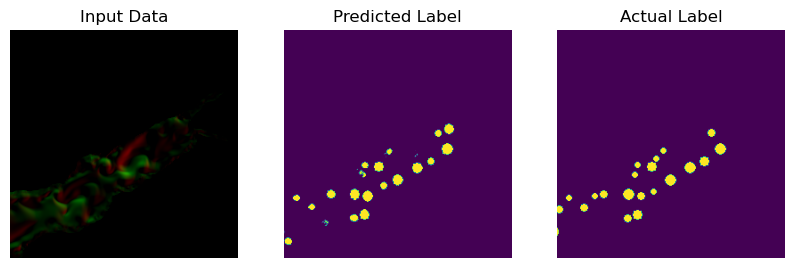

In [53]:
train_file_dir = "../downloads/data4test/data/"
label_file_dir = "../downloads/data4test/label/"
predict_random_sample(train_file_dir=train_file_dir, label_file_dir=label_file_dir)

In [55]:
from utils import utils
validate_files = os.listdir(train_file_dir)
split = int(0.85 * len(validate_files))

#split into training and testing
test_files  = validate_files[split:]
test_data = utils.validImage_generator(files=test_files, batch_size=32)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


In [58]:
model.compile('Adam', loss=sm.losses.bce_dice_loss, metrics=[sm.metrics.iou_score])

In [59]:
model.evaluate(test_data)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `

KeyboardInterrupt: 

Got iou_score 0.7901, i stopped evaluation